# Assignment 1  
### 1).  Cargar en Jupyter el archivo suministrado: covid_global.csv.

*En este trabajo se usó la librerias pandas, math y el matplotlib incorporado en pandas.*

In [240]:
import pandas as pd
import math
#filename = 'covid_global.csv'
#data = pd.read_csv(filename, header=0)

*Se fixea la data para tener solo valores que mantengan la acumulacion en las fechas*
(Lo comentamos debido a que ya se convirtió en el csv que está en la carpeta para no refixear y repetir procesos)

In [241]:
"""valor_max = data.max(axis=1, numeric_only=True)
for i in data.index:  
    for j in data.columns:
        if (data.loc[i,j]==0):
            try:
                secuencia = max(data.loc[i,'01/22/20':j])
                tem = secuencia
            except:
                tem = 0    
            data.loc[i,j]=tem 
data.to_csv('covid_global_CORREGIDO.csv',index=False)"""

"valor_max = data.max(axis=1, numeric_only=True)\nfor i in data.index:  \n    for j in data.columns:\n        if (data.loc[i,j]==0):\n            try:\n                secuencia = max(data.loc[i,'01/22/20':j])\n                tem = secuencia\n            except:\n                tem = 0    \n            data.loc[i,j]=tem \ndata.to_csv('covid_global_CORREGIDO.csv',index=False)"

*Importamos el nuevo documento*

In [242]:
filename = 'covid_global_CORREGIDO.csv'
data = pd.read_csv(filename, header=0)

### 2). Calcular y mostrar la cantidad de pacientes recuperados y muertos en cada continente.

*Inicializacion de continentes*
   

In [243]:
def pop_multi(continente):
    res = continente.copy()
    continente.pop("Lat")
    continente.pop("Long")
    continente.pop("Country")
    return res
america = data[(data["Lat"] > -56) & (data["Lat"] < 83) & (data["Long"] > -160) & (data["Long"] < -20)]
america_copia = pop_multi(america)
europa = data[(data["Lat"] > 35) & (data["Lat"] < 71) & (data["Long"] > 9) & (data["Long"] < 40)]
europa_copia =pop_multi(europa)
africa = data[(data["Lat"] > -35) & (data["Lat"] < 35) & (data["Long"] > -17) & (data["Long"] < 40)]
africa_copia =pop_multi(africa)
africa_derecha = data[(data["Lat"] > -35) & (data["Lat"] < 12) & (data["Long"] > 40) & (data["Long"] < 50)]
africa_derecha_copia =pop_multi(africa_derecha)
africa_recuperados = africa[africa["status"] == 'R'].max(axis=1,numeric_only=True).sum() + africa_derecha[africa_derecha["status"] == 'R'].max(axis=1,numeric_only=True).sum()
africa_muertos = africa[africa["status"] == 'D'].max(axis=1,numeric_only=True).sum() + africa_derecha[africa_derecha["status"] == 'D'].max(axis=1,numeric_only=True).sum()
asia = data[(data["Lat"] > 2) & (data["Lat"] < 78) & (data["Long"] > 27) & (data["Long"] < 170)]
asia_copia =pop_multi(asia)
oceania = data[(data["Lat"] > -50) & (data["Lat"] < -20) & (data["Long"] > 113) & (data["Long"] < 125)]
oceania_copia =pop_multi(oceania)
africa_copia = pd.concat([africa_copia, africa_derecha_copia],axis=0)

*Recuperados de cada continente*

In [244]:
america_recuperados = america[america["status"] == 'R']
america_recuperados.pop('status')
europa_recuperados = europa[europa["status"] == 'R']
europa_recuperados.pop('status')
asia_recuperados = asia[asia["status"] == 'R']
asia_recuperados.pop('status')
oceania_recuperados = oceania[oceania["status"] == 'R']
oceania_recuperados.pop('status')
recuperados_continentes = pd.DataFrame([['America' , america_recuperados.max(axis=1).sum()], 
                                       ['Europa', europa_recuperados.max(axis=1).sum()],
                                       ['Africa', africa_recuperados],
                                       ['asia',asia_recuperados.max(axis=1).sum()],
                                       ['oceania',oceania_recuperados.max(axis=1).sum()]], 
                                       columns=['Continente', 'Recuperados'])
print(recuperados_continentes)

  Continente  Recuperados
0    America     44815634
1     Europa     25987897
2     Africa      8385408
3       asia     64554076
4    oceania         1039


*Muertos de cada continente*

In [245]:
america_muertos = america[america["status"] == 'D']
america_muertos.pop('status')
europa_muertos = europa[europa["status"] == 'D']
europa_muertos.pop('status')
asia_muertos = asia[asia["status"] == 'D']
asia_muertos.pop('status')
oceania_muertos = oceania[oceania["status"] == 'D']
oceania_muertos.pop('status')
muertos_continentes = pd.DataFrame([['America' , america_muertos.max(axis=1).sum()], 
                                       ['Europa', europa_muertos.max(axis=1).sum()],
                                       ['Africa', africa_muertos],
                                       ['asia',asia_muertos.max(axis=1).sum()],
                                       ['oceania',oceania_muertos.max(axis=1).sum()]], 
                                       columns=['Continente', 'Muertos'])
print(muertos_continentes)

  Continente  Muertos
0    America  2457712
1     Europa   889177
2     Africa   272127
3       asia  1605746
4    oceania       10


### 3). Indicar el país con el mayor crecimiento en la cantidad de recuperados y muertos durante el año 2022

*Funcion de crecimiento*  
  
Esta función da la respuesta teniendo en cuenta la ecuación de crecimiento ((valorFinal-valorInicial)/valorInicial)*100. Este resultado lo vamos iterando en las diferentes filas y comparando para saber cual es el mayor de todos

In [246]:
def crecimiento(fecha_ini,fecha_fin,status):
    crecimiento, acum = 0,['',0,-1]
    data_filter = data[data["status"] == status]
    for i in data_filter.index:
        if (data_filter.loc[i,'01/22/20':fecha_ini].max() == 0):
            crecimiento = data_filter.loc[i,'01/22/20':fecha_fin].max()
        else:
            crecimiento = ((data_filter.loc[i,'01/22/20':fecha_fin].max() - data_filter.loc[i,'01/22/20':fecha_ini].max()) / data_filter.loc[i,'01/22/20':fecha_ini].max())*100
        if crecimiento > acum[2]:
            acum[2], acum[1] = crecimiento, i
    acum[0], acum[1] = status, data_filter.loc[acum[1],"Country"]
    return acum

*Paises con mayor crecimiento en muertes y recuperados*  
  
Debido a que en el año 2022 no se reportaron casos de recuperados, este da 0

In [247]:
crecimiento_final = pd.DataFrame([crecimiento('01/01/22','01/18/22','R'), 
                                       crecimiento('01/01/22','01/18/22','D')], 
                                       columns=['Status','Pais','Porcentaje de Crecimiento'])
print(crecimiento_final)

  Status       Pais  Porcentaje de Crecimiento
0      R  Venezuela                        0.0
1      D  Australia                      800.0


### 4). Indicar el país con el menor crecimiento en la cantidad de recuperados y muertos durante el año 2021.

*Funcion de menor crecimiento*  
  
Esta función da la respuesta teniendo en cuenta la ecuación de crecimiento ((valorFinal-valorInicial)/valorInicial)*100. Este resultado lo vamos iterando en las diferentes filas y comparando para saber cual es el menor de todos

In [248]:
def menor_crecimiento(fecha_ini,fecha_fin,status):
    crecimiento, acum = 0,['',0,math.inf]
    data_filter = data[data["status"] == status]
    for i in data_filter.index:
        if (data_filter.loc[i,'01/22/20':fecha_ini].max() == 0):
            crecimiento = data_filter.loc[i,'01/22/20':fecha_fin].max()
        else:
            crecimiento = ((data_filter.loc[i,'01/22/20':fecha_fin].max() - data_filter.loc[i,'01/22/20':fecha_ini].max()) / data_filter.loc[i,'01/22/20':fecha_ini].max())*100
        if crecimiento < acum[2]:
            acum[2], acum[1] = crecimiento, i
    acum[0], acum[1] = status, data_filter.loc[acum[1],"Country"]
    return acum

*Paises con menor crecimiento en muertos y en recuperados*
  
Estos dan 0 debido a que en la base de datos no se reportaron casos durante estas fechas.

In [249]:
crecimiento_final = pd.DataFrame([menor_crecimiento('01/01/21','12/31/21','R'), 
                                       menor_crecimiento('01/01/21','12/31/21','D')], 
                                       columns=['Status','Pais','Porcentaje de Crecimiento'])
print(crecimiento_final)

  Status            Pais  Porcentaje de Crecimiento
0      R  United Kingdom                        0.0
1      D          Canada                        0.0


### 5). Indicar por continente el país con mejor tasa de sobrevivientes para cada año: 2020, 2021 y 2022.

*Creamos la funcion de tasa de sobrevivientes teniendo en cuenta que haremos esta tasa con respecto al total de contagiados ya que no tenemos la poblacion total (Se ve que digamos en america sale dinamarca esto se debe a que groenlandia es colonia de dinamarca y en la base de datos sale de esta forma)*

In [250]:
def tasa_sobrevivientes(continente,dia):
    res = ['',0]
    continente_recuperados = continente[continente["status"]=='R'].loc[:,['Country',dia]].groupby(['Country']).sum()
    continente_muertos = continente[continente["status"]=='D'].loc[:,['Country',dia]].groupby(['Country']).sum()
    for i in continente_recuperados.index:
        valor_recuperados = continente_recuperados.loc[i,dia]
        valor_muertos = continente_muertos.loc[i,dia]
        operacion = (valor_recuperados / (valor_recuperados+valor_muertos))*100 if (valor_recuperados+valor_muertos != 0) else 0
        if (operacion>res[1]):
            res = [i,operacion]
    return res
mejor_tasa_sobrevivientes = pd.DataFrame([[2020,'America',tasa_sobrevivientes(america_copia,'12/31/20')[0],tasa_sobrevivientes(america_copia,'12/31/20')[1]], 
                                       [2020,'Europa',tasa_sobrevivientes(europa_copia,'12/31/20')[0],tasa_sobrevivientes(europa_copia,'12/31/20')[1]],
                                       [2020,'Africa',tasa_sobrevivientes(africa_copia,'12/31/20')[0],tasa_sobrevivientes(africa_copia,'12/31/20')[1]],
                                       [2020,'Asia',tasa_sobrevivientes(asia_copia,'12/31/20')[0],tasa_sobrevivientes(asia_copia,'12/31/20')[1]],
                                       [2020,'Oceania',tasa_sobrevivientes(oceania_copia,'12/31/20')[0],tasa_sobrevivientes(oceania_copia,'12/31/20')[1]],
                                       [2021,'America',tasa_sobrevivientes(america_copia,'12/31/21')[0],tasa_sobrevivientes(america_copia,'12/31/21')[1]], 
                                       [2021,'Europa',tasa_sobrevivientes(europa_copia,'12/31/21')[0],tasa_sobrevivientes(europa_copia,'12/31/21')[1]],
                                       [2021,'Africa',tasa_sobrevivientes(africa_copia,'12/31/21')[0],tasa_sobrevivientes(africa_copia,'12/31/21')[1]],
                                       [2021,'Asia',tasa_sobrevivientes(asia_copia,'12/31/21')[0],tasa_sobrevivientes(asia_copia,'12/31/21')[1]],
                                       [2021,'Oceania',tasa_sobrevivientes(oceania_copia,'12/31/21')[0],tasa_sobrevivientes(oceania_copia,'12/31/21')[1]],
                                       [2022,'America',tasa_sobrevivientes(america_copia,'01/18/22')[0],tasa_sobrevivientes(america_copia,'01/18/22')[1]], 
                                       [2022,'Europa',tasa_sobrevivientes(europa_copia,'01/18/22')[0],tasa_sobrevivientes(europa_copia,'01/18/22')[1]],
                                       [2022,'Africa',tasa_sobrevivientes(africa_copia,'01/18/22')[0],tasa_sobrevivientes(africa_copia,'01/18/22')[1]],
                                       [2022,'Asia',tasa_sobrevivientes(asia_copia,'01/18/22')[0],tasa_sobrevivientes(asia_copia,'01/18/22')[1]],
                                       [2022,'Oceania',tasa_sobrevivientes(oceania_copia,'01/18/22')[0],tasa_sobrevivientes(oceania_copia,'01/18/22')[1]]], 
                                       columns=['Año','Continente','Pais','Porcentaje de sobrevivientes'])
print(mejor_tasa_sobrevivientes)

     Año Continente        Pais  Porcentaje de sobrevivientes
0   2020    America     Denmark                    100.000000
1   2020     Europa    Holy See                    100.000000
2   2020     Africa     Burundi                     99.709724
3   2020       Asia      Bhutan                    100.000000
4   2020    Oceania   Australia                     98.937426
5   2021    America  Cabo Verde                     98.950037
6   2021     Europa    Holy See                    100.000000
7   2021     Africa      Israel                     99.044989
8   2021       Asia  Micronesia                    100.000000
9   2021    Oceania   Australia                     99.141221
10  2022    America  Cabo Verde                     98.873357
11  2022     Europa    Holy See                    100.000000
12  2022     Africa      Israel                     99.036383
13  2022       Asia  Micronesia                    100.000000
14  2022    Oceania   Australia                     99.141221


### 6. Realice un diagrama de barras (barplot) que permita visualizar la cantidad de pacientes recuperados por año para los 10 primeros paises en tasa de contagio.

*(Debido a la base de datos, en este punto se va a hacer con respecto a la tasa de recuperados)*

                     Pais        Tasa  Recuperados
149                 Samoa  100.000000            3
116            Micronesia  100.000000            1
160       Solomon Islands  100.000000           20
75               Holy See  100.000000           27
112      Marshall Islands  100.000000            4
19                 Bhutan   99.876084         2418
142                 Qatar   99.719894       224285
185  United Arab Emirates   99.670132       664130
109              Maldives   99.648355        75095
12                Bahrain   99.479558       267220


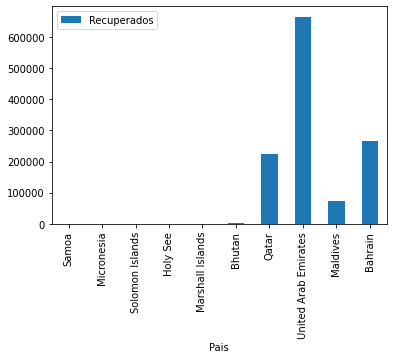

In [251]:
data_recuperados = data[data['status']=='R'].loc[:,['Country','01/18/22']].groupby(['Country']).sum()
data_muertos = data[data['status']=='D'].loc[:,['Country','01/18/22']].groupby(['Country']).sum()
data_tasa = pd.DataFrame([],columns=['Pais','Tasa','Recuperados'])
index = 0
for i in data_recuperados.index:
        valor_recuperados = data_recuperados.loc[i,'01/18/22']
        valor_muertos = data_muertos.loc[i,'01/18/22']
        operacion = (valor_recuperados / (valor_recuperados+valor_muertos))*100 if (valor_recuperados+valor_muertos != 0) else 0
        data_tasa.loc[index]= [i,operacion,valor_recuperados]
        index += 1
data_tasa = data_tasa.sort_values(by=['Tasa'],ascending=False)
print(data_tasa.head(10))
barplot = data_tasa.head(10).plot.bar(x='Pais',y='Recuperados')



### 7). Realice un diagrama de barras (barplot) que permita visualizar la cantidad de pacientes fallecidos por año para los 10 primeros paises en tasa de contagio.

*(Debido a la base de datos, en este punto se va a hacer con respecto a la tasa de fallecidos)*

               Pais        Tasa  Muertos
169          Sweden  100.000000    15558
186  United Kingdom   85.938614   153018
174        Tanzania   80.280172      745
69          Grenada   55.890411      204
16          Belgium   47.964898    28695
154          Serbia   45.747351    13124
175        Thailand   44.899633    21898
125     Netherlands   42.940721    21652
191         Vietnam   39.834337    35972
164           Spain   37.771929    91277


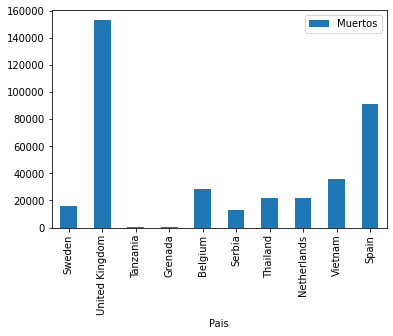

In [252]:
data_tasa_muertos = pd.DataFrame([],columns=['Pais','Tasa','Muertos'])
index = 0
for i in data_recuperados.index:
        valor_recuperados = data_recuperados.loc[i,'01/18/22']
        valor_muertos = data_muertos.loc[i,'01/18/22']
        operacion = (valor_muertos / (valor_recuperados+valor_muertos))*100 if (valor_recuperados+valor_muertos != 0) else 0
        data_tasa_muertos.loc[index]= [i,operacion,valor_muertos]
        index += 1
data_tasa_muertos = data_tasa_muertos.sort_values(by=['Tasa'],ascending=False)
print(data_tasa_muertos.head(10))
barplot = data_tasa_muertos.head(10).plot.bar(x='Pais',y='Muertos')

### 8). Realice un diagrama de caja (boxplot) con las cifras de los tres años para Colombia, para pacientes recuperados y muertos. ¿Cuál es su interpretación a lo visualizado en el gráfico?

*Boxplots de los recuperados*

<AxesSubplot:>

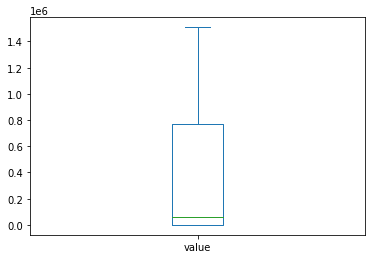

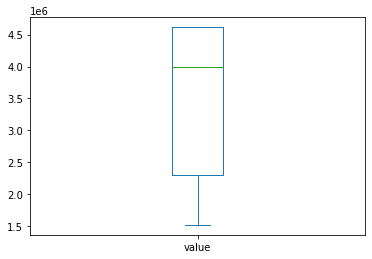

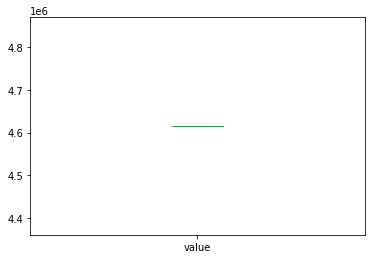

In [253]:
colombia = data[data['Country']=='Colombia']
datos_2020_R=colombia[colombia['status']=='R'].loc[:,'01/22/20':'12/31/20']
datos_2021_R=colombia[colombia['status']=='R'].loc[:,'01/01/21':'12/31/21']
datos_2022_R=colombia[colombia['status']=='R'].loc[:,'01/01/22':'01/18/22']
datos_2020_R.melt().plot.box()
datos_2021_R.melt().plot.box()
datos_2022_R.melt().plot.box()

### Analisis
#### 2020
En este caso tenemos que la mediana se encuentra mucho mas abajo de la caja, esto quiere decir que aunque hay datos aislados de recuperados, la mayoria se encuentran debajo de la mediana, esto nos da a conocer que este resultado de recuperados está subiendo debido a que tenemos es un acumulado por fechas.
#### 2021
En este caso tenemos que la mediana ahora se encuentra más arriba y el rango que tenemos es mucho más amplio, esto nos indica que los datos se concentran en la parte superior, es decir hay más recuperados que en el periodo anterior.
#### 2022
En este caso tenemos que al todos los datos en 2022 ser 0 solo nos plantea un punto.  
  
*Boxplots de los muertos*

<AxesSubplot:>

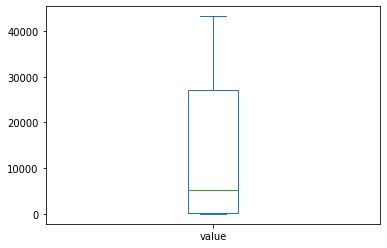

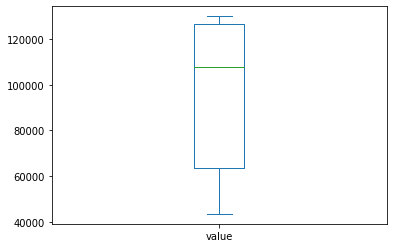

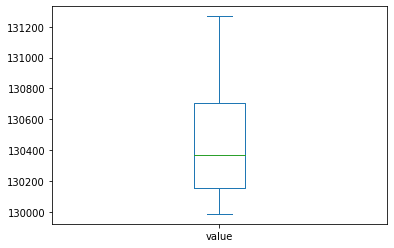

In [254]:
colombia = data[data['Country']=='Colombia']
datos_2020_D=colombia[colombia['status']=='D'].loc[:,'01/22/20':'12/31/20']
datos_2021_D=colombia[colombia['status']=='D'].loc[:,'01/01/21':'12/31/21']
datos_2022_D=colombia[colombia['status']=='D'].loc[:,'01/01/22':'01/18/22']
datos_2020_D.melt().plot.box()
datos_2021_D.melt().plot.box()
datos_2022_D.melt().plot.box()

### Analisis
#### 2020
En este caso tenemos que la mediana se encuentra mucho mas abajo de la caja, esto quiere decir que aunque hay datos aislados de muertos, la mayoria se encuentran debajo de la mediana, esto nos da a conocer que este resultado de muertos está subiendo debido a que tenemos es un acumulado por fechas.
#### 2021
En este caso tenemos que la mediana ahora se encuentra más arriba y el rango que tenemos es mucho más amplio, esto nos indica que los datos se concentran en la parte superior, es decir hay más recuperados que en el periodo anterior.
#### 2022
En este caso tenemos que la mediana se está acercando a la mitad de la caja, esto quiere decir que la mediana poco a poco se está acercando a la media.

  
  
### 9). Para cada una de las variables muestre el consolidado de la siguiente información: valor mínimo, primer cuartil, promedio, tercer cuartil y valor máximo. Recuerde se requiere para cada variable numérica.


In [255]:
def puntonueve():
    columnas = list(data.loc[:,:])
    lista = []
    for i in range(3,data.shape[1]-1):
        lista.append([columnas[i] ,data.iloc[:,i].describe()])
    return lista
print(puntonueve())

[['01/22/20', count    545.000000
mean       0.086239
std        1.404396
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       28.000000
Name: 01/22/20, dtype: float64], ['01/23/20', count    545.000000
mean       0.091743
std        1.407316
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       28.000000
Name: 01/23/20, dtype: float64], ['01/24/20', count    545.000000
mean       0.119266
std        1.686477
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       31.000000
Name: 01/24/20, dtype: float64], ['01/25/20', count    545.000000
mean       0.154128
std        2.200039
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       40.000000
Name: 01/25/20, dtype: float64], ['01/26/20', count    545.000000
mean       0.205505
std        2.875155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       52.000000
Na